# Prediction Modeling Based on Arrest feature

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
import scikitplot as skplt
from sklearn.metrics import classification_report


In [23]:
# Read in fresh cleaned dataset
df = pd.read_csv('chicago_data_cleaned.csv')


In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273756 entries, 0 to 4273755
Data columns (total 15 columns):
Date                    object
ID                      int64
Block                   int64
Primary Type            int64
Description             int64
Location Description    int64
Arrest                  bool
Domestic                bool
District                float64
Year                    int64
Latitude                float64
Longitude               float64
Month                   int64
Day                     int64
Hour                    int64
dtypes: bool(2), float64(3), int64(9), object(1)
memory usage: 432.0+ MB


In [25]:
df.head(3)

,Date,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Month,Day,Hour
0,2006-04-02 13:00:00,4673626,23279,12,173,66,False,False,16.0,2006,41.981913,-87.771996,4,2,13
1,2006-02-26 13:40:48,4673627,26672,10,217,75,True,False,3.0,2006,41.775733,-87.611920,2,26,13
2,2006-01-08 23:16:00,4673628,6596,0,40,58,False,False,3.0,2006,41.769897,-87.593671,1,8,23


In [26]:
df_for_model = df.drop(['ID','Arrest', 'Latitude', 'Longitude', 'Date'], axis=1)

labels = df['Arrest']

In [27]:
df_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4273756 entries, 0 to 4273755
Data columns (total 10 columns):
Block                   int64
Primary Type            int64
Description             int64
Location Description    int64
Domestic                bool
District                float64
Year                    int64
Month                   int64
Day                     int64
Hour                    int64
dtypes: bool(1), float64(1), int64(8)
memory usage: 297.5 MB


In [28]:
def evaluate_features(X, y, key=0):
    """
    General helper function for evaluating effectiveness of passed features in ML model

    Prints out Log loss, accuracy, and confusion matrix with 3-fold stratified cross-validation

    Parameters
    ----------
    X : Features array

    y : Labels array

    key: 0 = DecisionTreeClassifier (Default)
         1 = ExtraTreeClassifier
         2 = RandomForestClassifier
         3 = KNeighborsClassifier
         4 = GaussianNB
    """

    clf = [DecisionTreeClassifier(),
           ExtraTreeClassifier(),
           RandomForestClassifier(),
           KNeighborsClassifier(),
           GaussianNB()]
    
    clf_names = ['DecisionTreeClassifier',
                 'ExtraTreeClassifier',
                 'RandomForestClassifier', 
                 'KNeighborsClassifier',
                 'GaussianNB']

    probabilities = cross_val_predict(clf[key], X, y, cv=StratifiedKFold(n_splits=2, random_state=8),
                                      n_jobs=-1, method='predict_proba', verbose=2)
    predicted_indices = np.argmax(probabilities, axis=1)
    classes = np.unique(y)
    predicted = classes[predicted_indices]
    print('Log loss: {}'.format(log_loss(y, probabilities)))
    print('Accuracy: {}'.format(accuracy_score(y, predicted)))
    title = "Confusion Matrix for " + labels.name + " with " + clf_names[key]
    skplt.metrics.plot_confusion_matrix(y, predicted, normalize=True, figsize=(20,10), title=title)
    
    print(classification_report(y, predicted))
    plt.show()

## DecisionTreeClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   40.5s finished


Log loss: 10.960998141585346
Accuracy: 0.6826274125148932
              precision    recall  f1-score   support

       False       0.80      0.75      0.77   3083199
        True       0.44      0.51      0.47   1190557

   micro avg       0.68      0.68      0.68   4273756
   macro avg       0.62      0.63      0.62   4273756
weighted avg       0.70      0.68      0.69   4273756



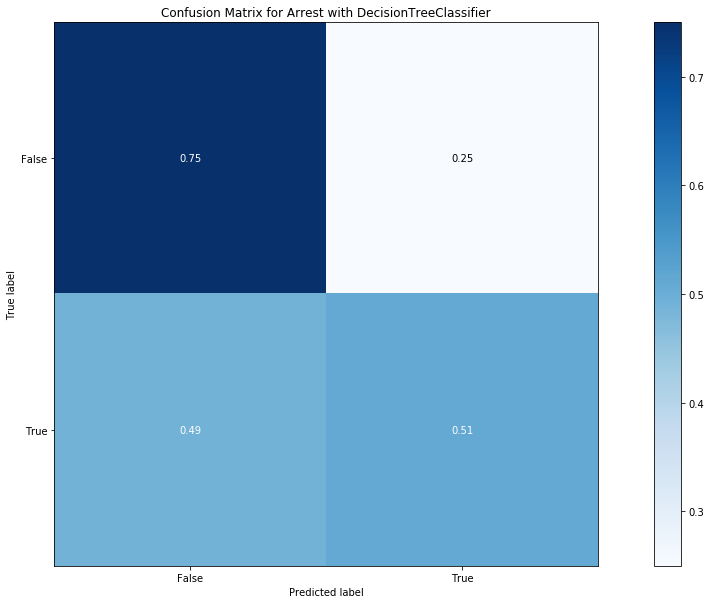

In [29]:
evaluate_features(df_for_model, labels)

## ExtraTreeClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   17.7s finished


Log loss: 10.85734955904814
Accuracy: 0.6856081629367704
              precision    recall  f1-score   support

       False       0.83      0.71      0.77   3083199
        True       0.45      0.62      0.52   1190557

   micro avg       0.69      0.69      0.69   4273756
   macro avg       0.64      0.66      0.64   4273756
weighted avg       0.72      0.69      0.70   4273756



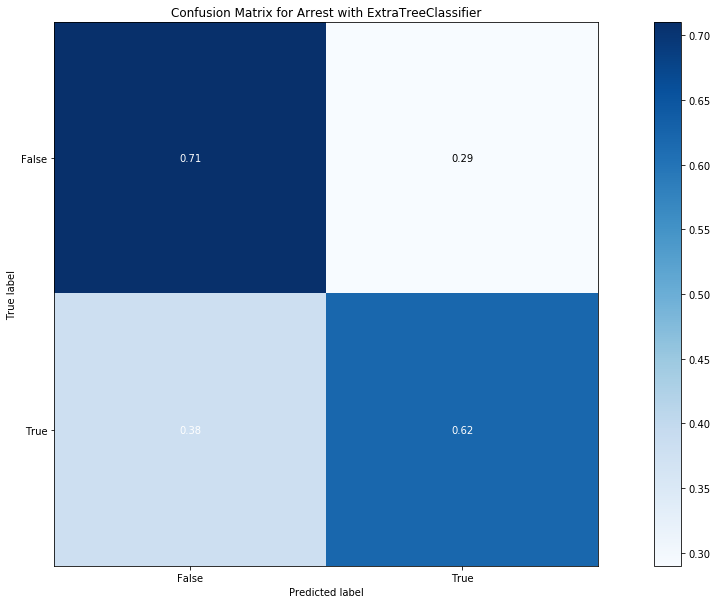

In [30]:
evaluate_features(df_for_model, labels, 1)

## RandomForestClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.7min finished


Log loss: 1.5256187751983736
Accuracy: 0.7297157348243559
              precision    recall  f1-score   support

       False       0.82      0.81      0.81   3083199
        True       0.51      0.53      0.52   1190557

   micro avg       0.73      0.73      0.73   4273756
   macro avg       0.67      0.67      0.67   4273756
weighted avg       0.73      0.73      0.73   4273756



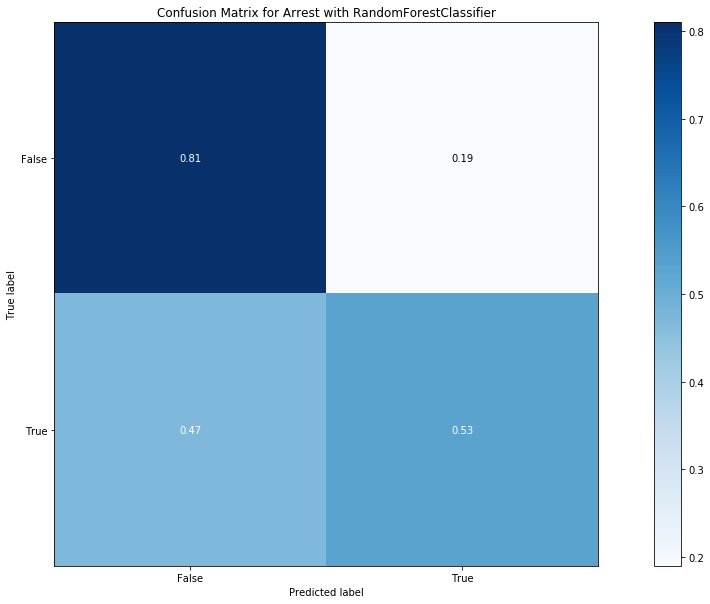

In [31]:
evaluate_features(df_for_model,labels,2)

## KNeighborsClassifier:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  2.0min finished


Log loss: 2.0076820903488284
Accuracy: 0.8340104114507239
              precision    recall  f1-score   support

       False       0.85      0.94      0.89   3083199
        True       0.78      0.57      0.66   1190557

   micro avg       0.83      0.83      0.83   4273756
   macro avg       0.81      0.75      0.77   4273756
weighted avg       0.83      0.83      0.83   4273756



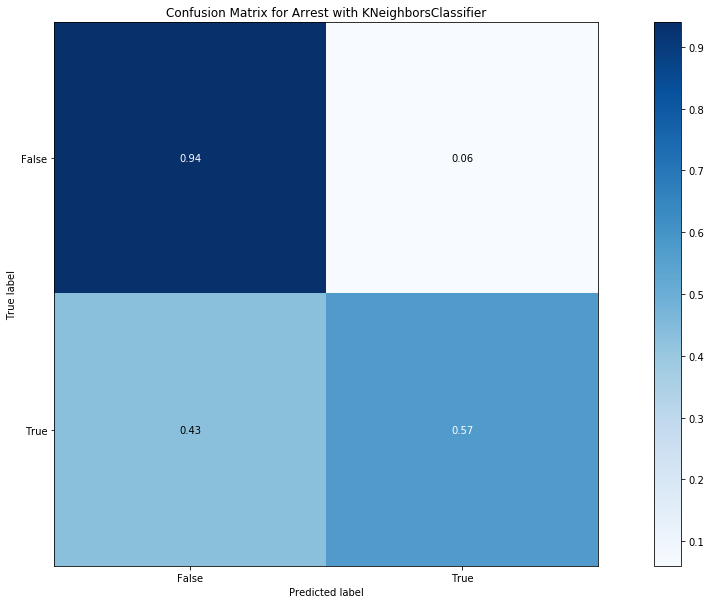

In [32]:
evaluate_features(df_for_model,labels,3)

## GaussianNB:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   11.9s finished


Log loss: 0.6887720060709469
Accuracy: 0.6944006630233452
              precision    recall  f1-score   support

       False       0.76      0.84      0.80   3083199
        True       0.44      0.33      0.37   1190557

   micro avg       0.69      0.69      0.69   4273756
   macro avg       0.60      0.58      0.59   4273756
weighted avg       0.67      0.69      0.68   4273756



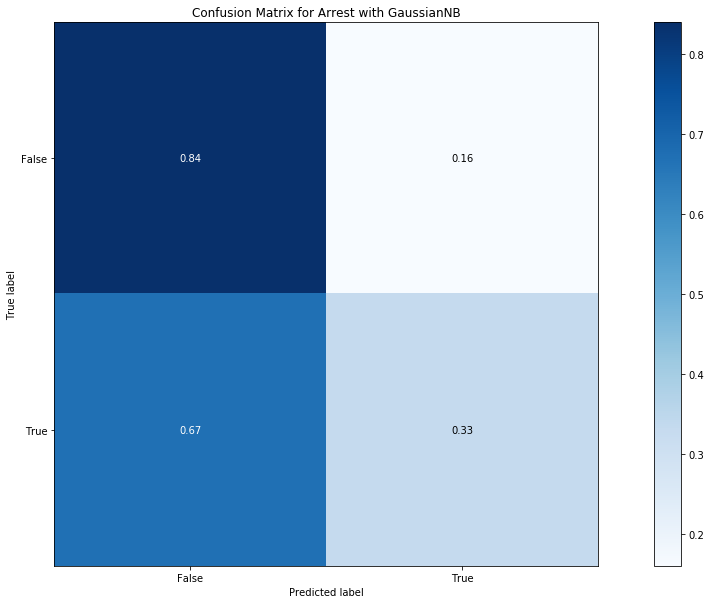

In [33]:
evaluate_features(df_for_model,labels,4)